## Short visual check

### The purpose of this file

In this notebook I check the sample files before processing them to design the final data frame on which the machine learning algorith is going to be trained. There are many sources of error whilst carrying out the experiments and collecting the data. If we want to be sure that the machine learning algorithm works well, we need to train it on good quality data. I have an expectation about what form the different acceleration/angle-time graphs should be if the data has been collected properly, so I make a visual check on the data before feeding the final dataset.
In this notebook I 
 - open and read the file from the folder;
 - process the file to create a proper pandas data frame;
 - convert the str data to numeric in the data frame;
 - plot the graphs from the data frame;
 - drop the data file if I find that the data is not in good quality.

### Importing the important libraries

In [1]:
import pandas as pd
import os
import glob
from matplotlib import pyplot as plt

### Accessing files and get the ansolute paths to them

In [2]:
# accessing files

def get_files(filepath):
    all_files = []
    for root, dirs, files in os.walk(filepath):
        files = glob.glob(os.path.join(root, '*.txt'))
        for f in files:
            all_files.append(os.path.abspath(f))
            
        return all_files

In [3]:
# checking how the function works
get_files('Data')

["C:\\Users\\at\\OneDrive - Blundell's School\\Scientific_personal\\Data Science\\My own projects\\ML_Microbit\\Data\\MLtest1.txt"]

### Creating data frame from the files

In [4]:
# processing file

def process_file(datafile):
    myfile = open(datafile, 'r')
    datalist = myfile.readlines()
    data_to_frame = []
    for item in datalist:
        item = item.split(sep = ',')
        data_to_frame.append(item)
            
    df = pd.DataFrame(data = data_to_frame, columns = ['a_x', 'a_y', 'angle'])
    return df
        
        

### Converting data in the frame to numeric

In [6]:
# The data sent by the Micro:bit had to be in str format, but for processing the data we need it in numeric format.

def to_numeric(df):
    df['a_x'] = pd.to_numeric(df['a_x'])
    df['a_y'] = pd.to_numeric(df['a_y'])
    df['angle'] = pd.to_numeric(df['angle'])
    
    return df
    

### Plotting the graphs

In [7]:
# plot graphs

def plot_graph(df):
    figure = plt.figure(figsize = (15, 10))
    ax = figure.add_axes([0,0,0.75, 0.75])
    
    graph_x = ax.plot(range(df.shape[0]), df['a_x'], 'r-')
    graph_y = ax.plot(range(df.shape[0]), df['a_y'], 'g-')
    graph_ang = ax.plot(range(df.shape[0]), df['angle'], 'b-')
    ax.set_xlabel('number of smaple')
    ax.set_ylabel('a_x/a_y/angle')
    ax.legend(labels = ('a_x', 'a_y', 'angle'), loc = 'upper right')
    
    plt.show()

### Applying the functions above and dropping files if necessary

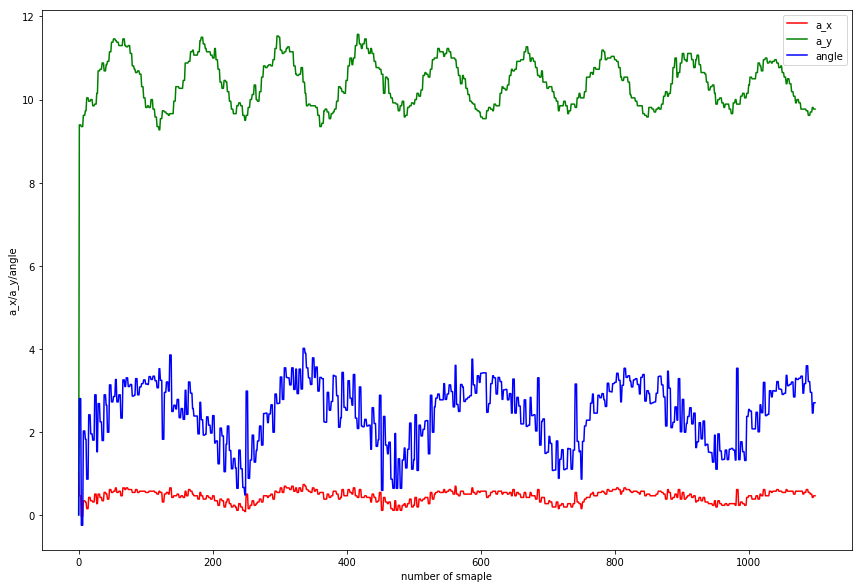

Are you happy with the graph? y/ny


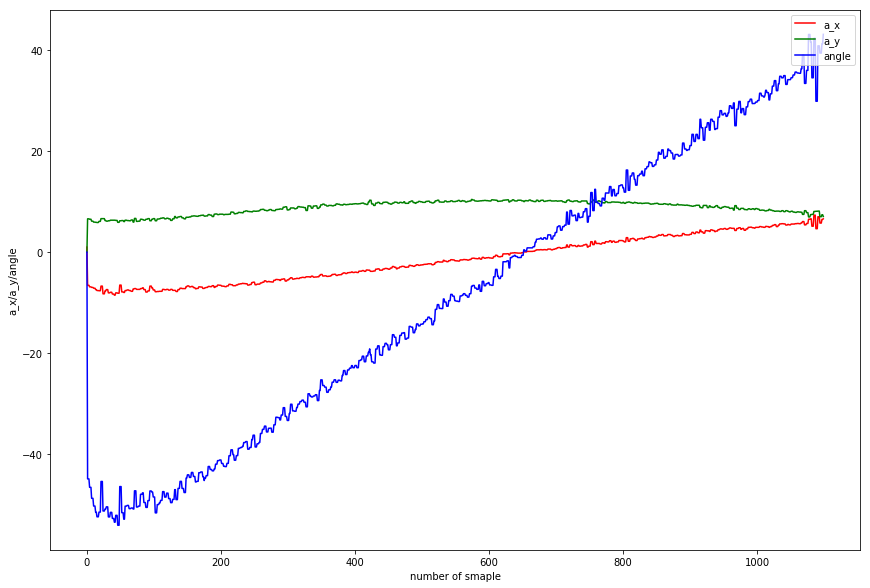

In [ ]:
# checking the files

data_files = get_files('Data')


for i in range(len(data_files)):
    df = process_file(data_files[i])
    df = to_numeric(df)
    plot_graph(df)
    keep = input('Are you happy with the graph? y/n')
    if keep == 'n':
        os.remove(data_files[i])
        

    